RNN Architecture: The Recurrent Neural Network implementation utilizes LSTM layers to capture temporal dependencies in the sleep stage transitions. The architecture comprises two stacked LSTM layers, each with 64 units and tanh activation functions. To combat overfitting, dropout layers with a 30% rate are implemented between the LSTM layers. The sequential processing is followed by a dense layer of 64 units with ReLU activation, before the final 5-unit softmax classification layer. This architecture processes the same EEG data as the CNN but treats it as a time series problem, achieving a slightly improved test accuracy of 42.6%. The incorporation of dropout layers and the deeper architecture demonstrates an attempt to balance model complexity with generalization capability, though the modest performance improvement over the CNN suggests that additional refinements might be necessary for robust sleep stage classification.

C:\Users\Roni\AppData\Local\Temp\ipykernel_19240\203713330.py:15: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X = np.array([np.fromstring(chunk[1:-1], sep=' ') for chunk in df["Chunk"].values])
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,405 (212.52 KB)

 Trainable params: 54,405 (212.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3960 - loss: 1.4882 - val_accuracy: 0.4323 - val_loss: 1.3780
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4027 - loss: 1.4054 - val_accuracy: 0.4323 - val_loss: 1.3736
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4152 - loss: 1.3903 - val_accuracy: 0.4323 - val_loss: 1.3730
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4148 - loss: 1.3854 - val_accuracy: 0.4405 - val_loss: 1.3702
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4244 - loss: 1.3846 - val_accuracy: 0.4439 - val_loss: 1.3708
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4221 - loss: 1.3803 - val_accuracy: 0.4453 - val_loss: 1.3673
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4148 - loss: 1.4008 - val_accuracy: 0.4446 - val_loss: 1.3625
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4385 - loss: 1.3831 - val_accuracy: 0.

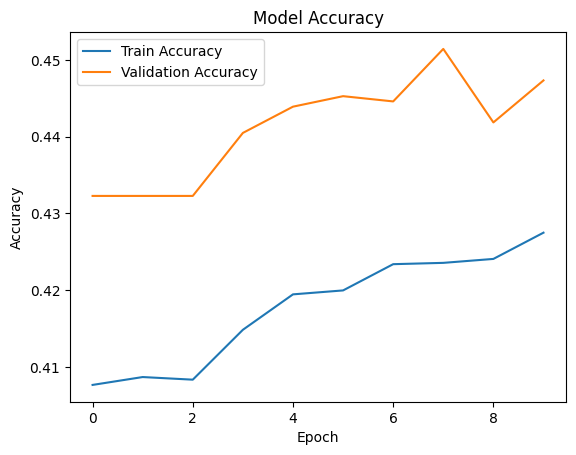

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout


# Load processed data
df = pd.read_csv("processed_sleep_data.csv")

# Convert the 'Chunk' column to numerical arrays
X = np.array([np.fromstring(chunk[1:-1], sep=' ') for chunk in df["Chunk"].values])
y = df["Label"].values

# Map labels to integers
label_map = {"W": 0, "N1": 1, "N2": 2, "N3": 3, "R": 4}
y = np.array([label_map[label.strip()] for label in y])

# Normalize the features
X = X / np.max(np.abs(X), axis=1, keepdims=True)

# Reshape X to make it compatible with RNN input requirements (samples, timesteps, features)
X = X[..., np.newaxis]  # Shape: (samples, timesteps, features)

# One-hot encode labels
y = to_categorical(y, num_classes=len(label_map))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple RNN model using LSTM
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(label_map), activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
True Labels vs Predicted Labels:
   True Label  Predicted Label
0           1                0
1           4                2
2           2                0
3           0                0
4           2                2
5           2                2
6           2                2
7           1                2
8           2                2
9           0                2


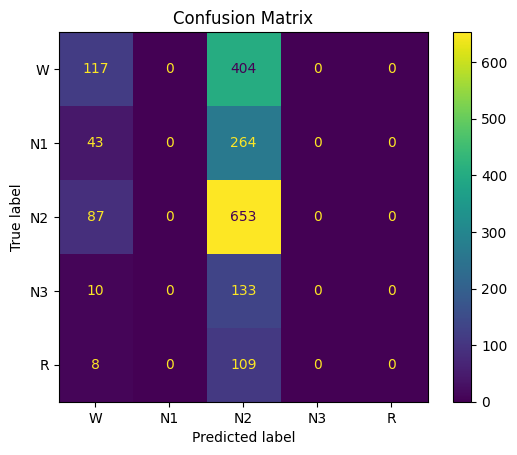

Classification Report:
              precision    recall  f1-score   support

           W       0.44      0.22      0.30       521
          N1       0.00      0.00      0.00       307
          N2       0.42      0.88      0.57       740
          N3       0.00      0.00      0.00       143
           R       0.00      0.00      0.00       117

    accuracy                           0.42      1828
   macro avg       0.17      0.22      0.17      1828
weighted avg       0.29      0.42      0.31      1828



C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Make predictions on the test set
y_pred_probabilities = model.predict(X_test)

# Step 2: Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Step 3: Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Step 4: Print the original vs. predicted labels in a DataFrame
results_df = pd.DataFrame({
    'True Label': y_true_labels,
    'Predicted Label': y_pred_labels
})

# Display the DataFrame for visual inspection
print("True Labels vs Predicted Labels:")
print(results_df.head(10))  # Display the first 10 results

# Optionally save the results to a CSV file for further analysis
results_df.to_csv("predictions_vs_true_labels.csv", index=False)

# Step 5: Plot Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_map.keys()))
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Step 6: Print Classification Report
report = classification_report(y_true_labels, y_pred_labels, target_names=list(label_map.keys()))
print("Classification Report:")
print(report)
